In [1]:
#!/usr/bin/env python
import string
import hashlib
import sys
import re
import numpy as np
from scipy import stats
"""
# -----------------------------------------------------------------------------
# this is the hive entry point:
# parameters are accepted as a tab delimited stream
# the stream must be read and broken
# variables will be assigned to the 'parameters' passed
# as a reference
# PARAMETERS EXPEXTED:
#
# -----------------------------------------------------------------------------
# 
"""
# -----------------------------------------------------------------------------
#
#  GOOD WORDS LIST
# list_values2 = "dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.google.com.goal.com/en-gb/live-scores.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels"
# list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
#
# BAD WORDS LIST
# list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"   
#
#
# BAD DOMAINS LIST
# list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
#
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# KL : Kullback-Leibler Divergence
# KS : Kolmogorov-Smirnov ( Sample sizes can be different)
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function7.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    print(list_values1,list_values2)
    print(values1,values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 0 # if "=0" it Make sure URL/IP digits are not-bad/good phishing but problem google.com dazn.com
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.').split("/")[0]
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO English URL function16.
def func_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO phishing URL function17.
def func_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO English URL function18.
def func_bad_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO phishing URL function19.
def func_bad_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
while True:
    line = sys.stdin.readline()
    if not line:
        break
    line = string.strip(line, "\n ")
    clienturls = string.split(line, "\t")
    clienturl = clienturls[0]
    url_lengh=func_url_lengh(clienturl)
    massiveurl=func_url_big(clienturl)
    count_at=func_url_count_at(clienturl)
    count_dot=func_url_count_dot(clienturl)
    url_is_ip=func_url_is_ip(clienturl)
    url_kl_en=func_kl_en_url(clienturl)
    count_dot_com=func_count_dot_com(clienturl)
    url_ks_en=func_ks_en_url(clienturl)
    print ("\t".join([ url_lengh, massiveurl, count_at, count_dot, url_is_ip, url_kl_en, count_dot_com,url_ks_en ]))
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# TEST FUNCTIONS5
print("F5")
print(func_url_is_ip("www.google.com"))
print(func_url_is_ip("35.190.74.53"))
print(func_url_is_ip("www.10.112.41.21.com/bug.html"))
#
# TEST FUNCTIONS7
print("F7")
print(func_kl_en_url("www.google.com"))
print(func_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_kl_en_url("sc.iasds01.com/dtc"))
print(func_kl_en_url("apps6746.ittprize57.life"))
print(func_kl_en_url("urlvalidation.com"))
print(func_kl_en_url("27media.ro"))
print(func_kl_en_url("dazn.com"))
print(func_kl_en_url("www.performgroup.com"))
print(func_kl_en_url("www.goal.com/en-gb/live-scores"))

# TEST FUNCTIONS9
print("F9")
print(func_bad_kl_en_url("www.google.com"))
print(func_bad_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_kl_en_url("sc.iasds01.com/dtc"))
print(func_bad_kl_en_url("apps6746.ittprize57.life"))
print(func_bad_kl_en_url("urlvalidation.com"))
print(func_bad_kl_en_url("27media.ro"))
print(func_bad_kl_en_url("dazn.com"))
# TEST FUNCTIONS8
print("F8")
print(func_ks_en_url("www.google.com"))
print(func_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_ks_en_url("sc.iasds01.com/dtc"))
print(func_ks_en_url("apps6746.ittprize57.life"))
print(func_ks_en_url("urlvalidation.com"))
print(func_ks_en_url("27media.ro"))
print(func_ks_en_url("dazn.com"))
# TEST FUNCTIONS10
print("F10")
print(func_bad_ks_en_url("www.google.com"))
print(func_bad_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_ks_en_url("sc.iasds01.com/dtc"))
print(func_bad_ks_en_url("apps6746.ittprize57.life"))
print(func_bad_ks_en_url("urlvalidation.com"))
print(func_bad_ks_en_url("27media.ro"))
print(func_bad_ks_en_url("dazn.com"))
#
# TEST FUNCTIONS11
print("F11")
print(func_kl_phish_url("www.google.com"))
print(func_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_kl_phish_url("sc.iasds01.com/dtc"))
print(func_kl_phish_url("www.dazn.com/en-DE"))
print(func_kl_phish_url("apps6746.ittprize57.life"))
print(func_kl_phish_url("urlvalidation.com"))
print(func_kl_phish_url("27media.ro"))
print(func_kl_phish_url("dazn.com"))
# TEST FUNCTIONS13
print("F13")
print(func_bad_kl_phish_url("www.google.com"))
print(func_bad_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_kl_phish_url("sc.iasds01.com/dtc"))
print(func_bad_kl_phish_url("www.dazn.com/en-DE"))
print(func_bad_kl_phish_url("apps6746.ittprize57.life"))
print(func_bad_kl_phish_url("urlvalidation.com"))
print(func_bad_kl_phish_url("27media.ro"))
print(func_bad_kl_phish_url("dazn.com"))
# TEST FUNCTIONS12
print("F12")
print(func_ks_phish_url("www.google.com"))
print(func_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_ks_phish_url("sc.iasds01.com/dtc"))
print(func_ks_phish_url("apps6746.ittprize57.life"))
print(func_ks_phish_url("urlvalidation.com"))
print(func_ks_phish_url("27media.ro"))
print(func_ks_phish_url("dazn.com"))
# TEST FUNCTIONS14
print("F14")
print(func_bad_ks_phish_url("www.google.com"))
print(func_bad_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_ks_phish_url("sc.iasds01.com/dtc"))
print(func_bad_ks_phish_url("apps6746.ittprize57.life"))
print(func_bad_ks_phish_url("urlvalidation.com"))
print(func_bad_ks_phish_url("27media.ro"))
print(func_bad_ks_phish_url("dazn.com"))
# TEST FUNCTIONS15
print("F15")
print(func_bad_words_domain("www.google.com"))
print(func_bad_words_domain("www.10.112.41.21.com/bug.html"))
print(func_bad_words_domain("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_words_domain("sc.iasds01.com/dtc"))
print(func_bad_words_domain("apps6746.ittprize57.life"))
print(func_bad_words_domain("urlvalidation.com"))
print(func_bad_words_domain("27media.ro"))
print(func_bad_words_domain("dazn.com"))
#
print("F16")
print(func_entropy_en_url("www.google.com"))
print(func_entropy_en_url("www.10.112.41.21.com/bug.html"))
print(func_entropy_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_entropy_en_url("sc.iasds01.com/dtc"))
print(func_entropy_en_url("apps6746.ittprize57.life"))
print(func_entropy_en_url("urlvalidation.com"))
print(func_entropy_en_url("27media.ro"))
print(func_entropy_en_url("dazn.com"))
#
print("F18")
print(func_bad_entropy_en_url("www.google.com"))
print(func_bad_entropy_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_entropy_en_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_entropy_en_url("sc.iasds01.com/dtc"))
print(func_bad_entropy_en_url("apps6746.ittprize57.life"))
print(func_bad_entropy_en_url("urlvalidation.com"))
print(func_bad_entropy_en_url("27media.ro"))
print(func_bad_entropy_en_url("dazn.com"))
#
print("F17")
print(func_entropy_phish_url("www.google.com"))
print(func_entropy_phish_url("www.10.112.41.21.com/bug.html"))
print(func_entropy_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_entropy_phish_url("sc.iasds01.com/dtc"))
print(func_entropy_phish_url("apps6746.ittprize57.life"))
print(func_entropy_phish_url("urlvalidation.com"))
print(func_entropy_phish_url("27media.ro"))
print(func_entropy_phish_url("dazn.com/en-DE"))
#
#
print("F19")
print(func_bad_entropy_phish_url("www.google.com"))
print(func_bad_entropy_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_entropy_phish_url("www.tciauto.com/js/prototype/prototype.js"))
print(func_bad_entropy_phish_url("sc.iasds01.com/dtc"))
print(func_bad_entropy_phish_url("apps6746.ittprize57.life"))
print(func_bad_entropy_phish_url("urlvalidation.com"))
print(func_bad_entropy_phish_url("27media.ro"))
print(func_bad_entropy_phish_url("dazn.com/en-DE"))
#

F5
0
1
1
F7
['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm']
[103 111 111 103 108 101  46  99 111 109] [103 111 111 103 108 101  46  99 111 109]
0.0
['1', '0', '.', '1', '1', '2', '.', '4', '1', '.', '2', '1', '.', 'c', 'o', 'm', '/', 'b', 'u', 'g', '.', 'h', 't', 'm', 'l'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm', '.', 'd', 'a', 'z', 'n', '.', 'c', 'o', 'm', '.', 'l', 'i', 'v', 'e', 's']
[ 49  48  46  49  49  50  46  52  49  46  50  49  46  99 111 109  47  98
 117 103  46 104 116 109 108] [103 111 111 103 108 101  46  99 111 109  46 100  97 122 110  46  99 111
 109  46 108 105 118 101 115]
-328.04527262467434
['t', 'c', 'i', 'a', 'u', 't', 'o', '.', 'c', 'o', 'm', '/', 'j', 's', '/', 'p', 'r', 'o', 't', 'o', 't', 'y', 'p', 'e', '/', 'p', 'r', 'o', 't', 'o', 't', 'y', 'p', 'e', '.', 'j'] ['g', 'o', 'o', 'g', 'l', 'e', '.', 'c', 'o', 'm', '.', 'd', 'a', 'z', 'n', '.', 'c', 'o', 'm', '.', 'l', 'i', 'v', 'e', 's', 'p', 'o', 'r'

In [2]:
import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
#
# Arguments
#

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_212"; OpenJDK Runtime Environment (build 1.8.0_212-8u212-b03-0ubuntu1.18.04.1-b03); OpenJDK 64-Bit Server VM (build 25.212-b03, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt7cgtaax
  JVM stdout: /tmp/tmpt7cgtaax/h2o_notebookuser_started_from_python.out
  JVM stderr: /tmp/tmpt7cgtaax/h2o_notebookuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,10 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,8 months and 26 days !!!
H2O cluster name:,H2O_from_python_notebookuser_9ol2zl
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


In [3]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats

In [2]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats

sc = pyspark.SparkContext(appName="phishingURL-Clean-AUTOML-V3-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function6.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# KL : Kullback-Leibler Divergence
# KS : Kolmogorov-Smirnov ( Sample sizes can be different)
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function7.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from phishing URL  function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from Phishing URL function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 0 # if "=0" it Make sure URL/IP digits are not-bad/good phishing but problem google.com dazn.com
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.').split("/")[0]
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.apps6746.ittprize57.life.amatorskihokej.gilbertargentina.ar.coinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO English URL function16.
def func_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL Entropy TO phishing URL function17.
def func_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    return scalar_pvalue
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO English URL function18.
def func_bad_entropy_en_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 +="google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#   
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BDA URL Entropy TO phishing URL function19.
def func_bad_entropy_phish_url(var1):
    ##Making sure the analysis ignore uri and focus on typical pyshing/malware site names.
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar.split("/")[0]#cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    list_values2 +="27media.ro.urlvalidation.com.apps6746.ittprize57.life.amatorskihokej.pl.gilbertargentina.com.ar.coinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com" 
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2 = list_values2[idx_var2:(idx_var2+len_var1)]
    list_values2 = list(start_values2+list_values2)
    list_values2 = list_values2[:len_var1]
    list_of_ord_values2 = [ord(char) for char in list_values2]
    values2 = np.asarray(list_of_ord_values2)
    pvalue=stats.entropy(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.001:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# # BUG      : https://issues.apache.org/jira/browse/SPARK-12157
# # Solution : https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types/11389998
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Transformation DI ynverified=1/0 FROM yes/no
def func_url_verified(var1):
    if var1==None:
        return 1
    if ( var1.lower()=='yes'):
        return 1
    elif (var1.lower()=='no'):
        return 0
    else :
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
#
# UDF Functional DI Converstions 
func_url_verified_udf = udf(func_url_verified, IntegerType())
#
## NOT REQUIRED CONFUSES MODEL !!
### func_url_lang_en_ynverified_udf = udf(func_url_lang_en_ynverified, IntegerType())
#
# UDF COEFICIENT FUNCTIONS : [1-19] 
func_url_lengh_udf = udf(func_url_lengh, IntegerType())
func_url_big_udf = udf(func_url_big, IntegerType())
func_url_count_at_udf = udf(func_url_count_at, IntegerType())
func_url_count_dot_udf = udf(func_url_count_dot, IntegerType())
func_url_is_ip_udf = udf(func_url_is_ip, IntegerType())
func_count_dot_com_udf = udf(func_count_dot_com, IntegerType())
func_kl_en_url_udf = udf(func_kl_en_url, FloatType())
func_ks_en_url_udf = udf(func_ks_en_url, FloatType())
func_bad_kl_en_url_udf = udf(func_bad_kl_en_url, IntegerType())
func_bad_ks_en_url_udf = udf(func_bad_ks_en_url, IntegerType())
func_kl_phish_url_udf = udf(func_kl_phish_url, FloatType())
func_ks_phish_url_udf = udf(func_ks_phish_url, FloatType())
func_bad_kl_phish_url_udf = udf(func_bad_kl_phish_url, IntegerType())
func_bad_ks_phish_url_udf = udf(func_bad_ks_phish_url, IntegerType())
func_bad_words_domain_udf = udf(func_bad_words_domain, IntegerType())
func_entropy_en_url_udf = udf(func_entropy_en_url, FloatType())
func_entropy_phish_url_udf = udf(func_entropy_phish_url,FloatType())
func_bad_entropy_en_url_udf = udf(func_bad_entropy_en_url,IntegerType())
func_bad_entropy_phish_url_udf = udf(func_bad_entropy_phish_url,IntegerType())
#
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# Arguments
#
process_date="20181112"
ccrwal_raw_file="hdfs:///user/siemanalyst/data/raw/commoncrawl/dt="+process_date+"/clean-CC-MAIN-2018-43-index-.*.json"
phishtank_raw_file="hdfs:///user/siemanalyst/data/raw/phishtank/dt="+process_date+"/*.json"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/"
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/"
#
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=*/*.json"
#internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
## Get all URL Commom Crawl from
## List of Top Level Domains : *.com *.org *.co.uk *.ru *.net *.cn *.cz *.kp *.us "
# 
ccrawl_traindf = sqlContext.read.json(ccrwal_raw_file)
ccrawl_traindf.printSchema()
#
#### MODEL1 MODEL3 CCRAWL HAS NOT PHISHING URL
#.withColumn('ynverified',lit(0).cast('int'))\

## NOT REQUIRED CONFUSES MODEL !!
### 
#### MODEL 2
#.withColumn('ynverified',func_url_lang_en_ynverified_udf(ccrawl_traindf['languages']).cast('int') )\

drop_ccrawl_cols=['charset','digest','filename','verification_time','length','mime','mime-detected','offset','status']
## Assume URLS as not phishing ynverified=0 if EN as phishing ynverified=1
ccrawl_trainds = ccrawl_traindf\
.filter("url is not NULL")\
.drop(*drop_ccrawl_cols)\
.withColumn('ynverified',lit(0).cast('int'))\
.drop('languages')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))\
.withColumn('url_entropy_en',func_entropy_en_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_en',func_bad_entropy_en_url_udf(col('url')).cast('int'))\
.withColumn('url_entropy_phish',func_entropy_phish_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_phish',func_bad_entropy_phish_url_udf(col('url')).cast('int'))
#
ccrawl_trainds.printSchema()
ccrawl_persist=ccrawl_trainds.coalesce(1).write.json(ccrawl_staged_file , mode="overwrite")
#
phishtank_traindf= sqlContext.read.json(phishtank_raw_file)
phishtank_traindf.printSchema()
#
drop_phish_cols=['details','online','phish_detail_url','phish_id','submission_time','target','verification_time']
#
phishtank_trainds=phishtank_traindf\
.filter("url is not NULL")\
.drop(*drop_phish_cols)\
.withColumn('ynverified',func_url_verified_udf(col('verified')).cast('int'))\
.drop('verified')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))\
.withColumn('url_entropy_en',func_entropy_en_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_en',func_bad_entropy_en_url_udf(col('url')).cast('int'))\
.withColumn('url_entropy_phish',func_entropy_phish_url_udf(col('url')).cast('float'))\
.withColumn('url_bad_entropy_phish',func_bad_entropy_phish_url_udf(col('url')).cast('int'))
phishtank_trainds.printSchema()
#
phishtank_persist=phishtank_trainds.coalesce(1).write.json(phishtank_staged_file , mode="overwrite")
#
#
sc.stop()
#
print("Factor Calculation Done!")
#

ModuleNotFoundError: No module named 'findspark'

In [1]:
#
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
sc = pyspark.SparkContext(appName="Notebook-phishingURL-ModelBuild-AUTOML-V4-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
#
# Arguments
#
process_date="20181112"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/*.json"
#
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/*.json"
#
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=*/*.json"
#internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
urlpredict_internaldata_dfile=sqlContext.read.json(internal_staged_urlpredict_files)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL")\
.groupby(col('url')).agg( F.first(col('ynverified')).alias('ynverified'),\
     F.first(col('url_length')).alias('url_length'), F.first(col('massiveurl')).alias('massiveurl'),\
     F.first(col('count_at')).alias('count_at'), F.first(col('count_dot')).alias('count_dot'),\
     F.first(col('url_is_ip')).alias('url_is_ip'),F.first(col('count_dot_com')).alias('count_dot_com'),\
     F.first(col('url_kl_en')).alias('url_kl_en'), F.first(col('url_bad_kl_en')).alias('url_bad_kl_en'),\
     F.first(col('url_ks_en')).alias('url_ks_en'), F.first(col('url_bad_ks_en')).alias('url_bad_ks_en'),\
     F.first(col('url_kl_phish')).alias('url_kl_phish'),F.first(col('url_bad_kl_phish')).alias('url_bad_kl_phish'),\
     F.first(col('url_ks_phish')).alias('url_ks_phish'),F.first(col('url_bad_ks_phish')).alias('url_bad_ks_phish'),\
     F.first(col('url_bad_words_domain')).alias('url_bad_words_domain'),\
     F.first(col('url_entropy_en')).alias('url_entropy_en'),F.first(col('url_bad_entropy_en')).alias('url_bad_entropy_en'),\
     F.first(col('url_entropy_phish')).alias('url_entropy_phish'),F.first(col('url_bad_entropy_phish')).alias('url_bad_entropy_phish'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
urlpredict_internaldata_dfile.printSchema()
#
#
internal_phishing_malware_df=urlpredict_internaldata_dfile.\
select(col('url'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
internal_phishing_malware_df.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
ccrawl_staged=sqlContext.read.json(ccrawl_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
ccrawl_staged.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
phishtank_staged=sqlContext.read.json(phishtank_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.filter("url_entropy_en IS NOT NULL")\
.filter("url_bad_entropy_en IS NOT NULL")\
.filter("url_entropy_phish IS NOT NULL")\
.filter("url_bad_entropy_phish IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),\
       col('url_bad_words_domain').cast('int'),\
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_staged.printSchema()
#
#
phishtank_plus_urlpredict_internaldata=internal_phishing_malware_df.union(phishtank_staged).\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'),
       col('url_entropy_en').cast('double'), col('url_bad_entropy_en').cast('int'),\
       col('url_entropy_phish').cast('double'), col('url_bad_entropy_phish').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_plus_urlpredict_internaldata.printSchema()
#
#
phishtank_train_pd=phishtank_plus_urlpredict_internaldata.toPandas()
phishtank_test_pd=phishtank_plus_urlpredict_internaldata.toPandas().tail(5000)                                                                        
phishtank_train=h2o.H2OFrame(phishtank_train_pd)
phishtank_test=h2o.H2OFrame(phishtank_test_pd)
#
#
ccrawl_train_pd=ccrawl_staged.toPandas()  
ccrawl_test_pd=ccrawl_staged.toPandas().head(5000)
ccrawl_train_hf=h2o.H2OFrame(ccrawl_train_pd)
ccrawl_test_hf=h2o.H2OFrame(ccrawl_test_pd)
#
#
###### TRAINING PROCESS ############
# RBIND "Merge" all of 3 internal ccrawl and phishtank with rbind .
# function merge() doesn't work if both H2O/dataframes have same variables
#
train = ccrawl_train_hf.rbind(phishtank_train)
test = phishtank_test.rbind(ccrawl_test_hf)
#
#
print("train")
print(train.head(10))
print("test")
print(test.head(10))
#
#
# Identify predictors and response
x = train.columns
#
# test Learning is it a bit URL TRUE/FALSE
#y = 'massiveurl'
#
# Casual is it verified phishing from url characteristics TRUE/FALSE
y= 'ynverified'
x.remove(y)
#
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
#
# http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
# Balance Classes to compensate unbalanced data
# Run AutoML for 25 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=19, exclude_algos=["DRF","GLM"])
aml.train(x=x, y=y, training_frame=train)
#
sc.stop()
#
print("Model Training Done!")
#

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /opt/cloudera/parcels/Anaconda-5.1.0.1/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppha299nd
  JVM stdout: /tmp/tmppha299nd/h2o_siemanalyst_started_from_python.out
  JVM stderr: /tmp/tmppha299nd/h2o_siemanalyst_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_siemanalyst_q09ixm
H2O cluster total nodes:,1
H2O cluster free memory:,5.176 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


root
 |-- url: string (nullable = true)
 |-- ynverified: long (nullable = true)
 |-- url_length: long (nullable = true)
 |-- massiveurl: long (nullable = true)
 |-- count_at: long (nullable = true)
 |-- count_dot: long (nullable = true)
 |-- url_is_ip: long (nullable = true)
 |-- count_dot_com: long (nullable = true)
 |-- url_kl_en: double (nullable = true)
 |-- url_bad_kl_en: long (nullable = true)
 |-- url_ks_en: double (nullable = true)
 |-- url_bad_ks_en: long (nullable = true)
 |-- url_kl_phish: double (nullable = true)
 |-- url_bad_kl_phish: long (nullable = true)
 |-- url_ks_phish: double (nullable = true)
 |-- url_bad_ks_phish: long (nullable = true)
 |-- url_bad_words_domain: long (nullable = true)
 |-- url_entropy_en: double (nullable = true)
 |-- url_bad_entropy_en: long (nullable = true)
 |-- url_entropy_phish: double (nullable = true)
 |-- url_bad_entropy_phish: long (nullable = true)

root
 |-- url: string (nullable = true)
 |-- ynverified: integer (nullable = true)
 |-- 

url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain,url_entropy_en,url_bad_entropy_en,url_entropy_phish,url_bad_entropy_phish
http://0.cn/,0,12,0,0,1,0,0,-81.2642,1,0.10749,1,-10.3163,0,0.534416,0,1,0.0771917,0,0.00479274,0
http://0.cn/robots.txt,0,22,0,0,2,0,0,85.8588,0,0.54074,0,131.9,1,0.54074,0,1,0.118763,0,0.0830187,0
http://glortzrediffmail.0.cn/,0,29,0,0,2,0,0,254.789,1,0.972789,0,212.462,1,0.972789,0,0,0.0888557,0,0.0773457,0
http://glortzrediffmail.0.cn/robots.txt,0,39,0,0,3,0,0,303.281,1,0.943936,0,305.849,1,0.943936,0,0,0.0895893,0,0.066725,0
http://0-0-0.cn/,0,16,0,0,1,0,0,-142.413,1,0.0496544,1,-62.0097,0,0.0496544,1,0,0.178259,0,0.177603,0
http://0-0-0.cn/robots.txt,0,26,0,0,2,0,0,-39.9272,1,0.425472,1,-27.8402,0,0.218166,1,0,0.128864,0,0.118376,0
http://0-0-0.cn/robots.txt,0,26,0,0,2,0,0,-39.9272,1,0.425472,1,-27.8402,0,0.218166,1,0,0.128864,0,0.118376,0
http://0-0-0.cn/view.asp?id=470,0,31,0,0,2,0,0,-110.365,1,0.0505876,1,-232.331,0,0.0505876,1,0,0.175403,0,0.117448,0
http://0-0-0.cn/view.asp?id=476,0,31,0,0,2,0,0,-108.468,1,0.0505876,1,-230.947,0,0.0505876,1,0,0.173363,0,0.115346,0
http://0-0-0.cn/view.asp?id=477,0,31,0,0,2,0,0,-108.085,1,0.0505876,1,-230.649,0,0.0505876,1,0,0.17306,0,0.115033,0



test


url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain,url_entropy_en,url_bad_entropy_en,url_entropy_phish,url_bad_entropy_phish
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499/,1,61,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499,1,60,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=d3993414284beca7c9d20faab65c690f/,1,79,0,0,1,0,1,-568.747,1,0.000130907,1,-122.362,0,0.000278609,1,0,0.0728177,0,0.100008,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=300308dff2f464ff22433eb64d8eb61f/,1,79,0,0,1,0,1,-579.733,1,0.000130907,1,-227.502,0,0.000278609,1,0,0.0792611,0,0.0905584,0
http://www.miroslavopava.cz/media/system/js/validateotp.htm,1,59,0,0,3,0,0,408.304,1,0.945549,0,872.05,1,0.652101,0,0,0.0654741,0,0.097199,0
http://suelunn.com/aut.php?email=crl398@gmail.com,1,49,0,1,3,0,2,26.3968,0,0.738162,0,323.174,1,0.738162,0,0,0.0551491,0,0.0643832,0
http://metaswitchweightloss.com/alibaba/alibaba/,1,48,0,0,1,0,1,366.07,1,0.723665,0,667.595,1,0.361313,1,0,0.0663577,0,0.0697863,0
http://odbiorcy.emoda.nnn.vc/login.php,1,38,0,0,4,0,0,216.156,1,0.999998,0,293.179,1,0.993644,0,0,0.0862164,0,0.0917235,0
http://www.onefd.edu.dz.forexwinz.com/facebook/FR/login.php,1,59,0,0,6,0,1,291.321,1,0.777684,0,468.467,1,0.777684,0,0,0.0890603,0,0.0842165,0
http://tmsvent.ru/layouts/joomla/edit/js/1/,1,43,0,0,1,0,0,166.841,1,0.825316,0,323.869,1,0.621292,0,0,0.0661926,0,0.0801017,0



AutoML progress: |████████████████████████████████████████████████████████| 100%
Model Training Done!


In [2]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20181207_142115,0.984928,0.114953,0.0681938,0.171004,0.0292425
StackedEnsemble_BestOfFamily_AutoML_20181207_142115,0.984594,0.116871,0.0682627,0.17174,0.0294946
XGBoost_grid_1_AutoML_20181207_142115_model_2,0.983906,0.106543,0.0684104,0.169011,0.0285649
GBM_4_AutoML_20181207_142115,0.983347,0.107122,0.0719509,0.170827,0.0291819
GBM_5_AutoML_20181207_142115,0.982843,0.109232,0.0721202,0.172626,0.0297998
GBM_grid_1_AutoML_20181207_142115_model_3,0.982289,0.11407,0.075264,0.177135,0.0313769
XGBoost_2_AutoML_20181207_142115,0.981742,0.113978,0.0806536,0.176776,0.0312497
XGBoost_3_AutoML_20181207_142115,0.981604,0.113609,0.0772065,0.176363,0.0311039
GBM_3_AutoML_20181207_142115,0.980498,0.116253,0.0799594,0.177826,0.0316219
GBM_2_AutoML_20181207_142115,0.979197,0.12109,0.0864934,0.181827,0.0330612


In [3]:
# The leader model is stored here
aml.leader


Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20181207_142115
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.003586349659249784
RMSE: 0.059886139124590294
LogLoss: 0.0290903847020298
Null degrees of freedom: 119927
Residual degrees of freedom: 119919
Null deviance: 110466.17655090411
Residual deviance: 6977.503313090058
AIC: 6995.503313090058
AUC: 0.9999330004512917
pr_auc: 0.9974707091314416
Gini: 0.9998660009025835
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3031477129350715: 


,0,1,Error,Rate
0,98974.0,211.0,0.0021,(211.0/99185.0)
1,177.0,20566.0,0.0085,(177.0/20743.0)
Total,99151.0,20777.0,0.0032,(388.0/119928.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3031477,0.9906551,242.0
max f2,0.1756413,0.9936609,276.0
max f0point5,0.5264188,0.9937730,188.0
max accuracy,0.3072661,0.9967647,241.0
max precision,0.9906565,1.0,0.0
max recall,0.0306160,1.0,357.0
max specificity,0.9906565,1.0,0.0
max absolute_mcc,0.3031477,0.9886993,242.0
max min_per_class_accuracy,0.2010876,0.9961433,268.0
max mean_per_class_accuracy,0.1756413,0.9964680,276.0


Gains/Lift Table: Avg response rate: 17.30 %, avg score: 18.13 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100060,0.9884306,5.7816131,5.7816131,1.0,0.9887384,1.0,0.9887384,0.0578508,0.0578508,478.1613074,478.1613074
,2,0.0200037,0.9881846,5.7816131,5.7816131,1.0,0.9883081,1.0,0.9885233,0.0578026,0.1156535,478.1613074,478.1613074
,3,0.0300013,0.9879263,5.7816131,5.7816131,1.0,0.9880559,1.0,0.9883676,0.0578026,0.1734561,478.1613074,478.1613074
,4,0.0400073,0.9876794,5.7816131,5.7816131,1.0,0.9877976,1.0,0.9882250,0.0578508,0.2313069,478.1613074,478.1613074
,5,0.0500050,0.9873376,5.7816131,5.7816131,1.0,0.9875193,1.0,0.9880839,0.0578026,0.2891096,478.1613074,478.1613074
,6,0.1000017,0.9830421,5.7816131,5.7816131,1.0,0.9857747,1.0,0.9869294,0.2890614,0.5781709,478.1613074,478.1613074
,7,0.1500067,0.9355864,5.7816131,5.7816131,1.0,0.9705744,1.0,0.9814774,0.2891096,0.8672805,478.1613074,478.1613074
,8,0.2000033,0.0395296,2.6526380,4.9994345,0.4588059,0.3971323,0.8647127,0.8354033,0.1326231,0.9999036,165.2638020,399.9434536
,9,0.3000050,0.0199898,0.0009642,3.3332777,0.0001668,0.0249027,0.5765308,0.5652364,0.0000964,1.0,-99.9035835,233.3277745
,10,0.3999983,0.0178349,0.0,2.5000104,0.0,0.0187036,0.4324071,0.4286118,0.0,1.0,-100.0,150.0010423




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.03043839529696792
RMSE: 0.17446602906287492
LogLoss: 0.12000837051291367
Null degrees of freedom: 13451
Residual degrees of freedom: 13443
Null deviance: 12466.78385357459
Residual deviance: 3228.70520027943
AIC: 3246.70520027943
AUC: 0.9847703988255855
pr_auc: 0.9516822712144904
Gini: 0.969540797651171
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23797909350514934: 


,0,1,Error,Rate
0,10897.0,204.0,0.0184,(204.0/11101.0)
1,272.0,2079.0,0.1157,(272.0/2351.0)
Total,11169.0,2283.0,0.0354,(476.0/13452.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2379791,0.8972810,251.0
max f2,0.0557361,0.9055932,330.0
max f0point5,0.7739484,0.9203713,118.0
max accuracy,0.2410791,0.9646149,250.0
max precision,0.9906100,1.0,0.0
max recall,0.0164211,1.0,394.0
max specificity,0.9906100,1.0,0.0
max absolute_mcc,0.2379791,0.8760501,251.0
max min_per_class_accuracy,0.0410807,0.9408161,344.0
max mean_per_class_accuracy,0.0557361,0.9433414,330.0


Gains/Lift Table: Avg response rate: 17.48 %, avg score: 17.19 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100357,0.9884183,5.7218205,5.7218205,1.0,0.9887111,1.0,0.9887111,0.0574224,0.0574224,472.1820502,472.1820502
,2,0.0200714,0.9881610,5.7218205,5.7218205,1.0,0.9882873,1.0,0.9884992,0.0574224,0.1148447,472.1820502,472.1820502
,3,0.0300327,0.9878925,5.7218205,5.7218205,1.0,0.9880427,1.0,0.9883478,0.0569970,0.1718418,472.1820502,472.1820502
,4,0.0400684,0.9875848,5.7218205,5.7218205,1.0,0.9877404,1.0,0.9881957,0.0574224,0.2292641,472.1820502,472.1820502
,5,0.0500297,0.9871471,5.7218205,5.7218205,1.0,0.9873837,1.0,0.9880340,0.0569970,0.2862612,472.1820502,472.1820502
,6,0.1000595,0.9797530,5.5857891,5.6538048,0.9762259,0.9846396,0.9881129,0.9863368,0.2794556,0.5657167,458.5789108,465.3804805
,7,0.1500149,0.7031832,4.9810491,5.4297752,0.8705357,0.9214126,0.9489594,0.9647168,0.2488303,0.8145470,398.1049098,442.9775154
,8,0.2000446,0.0542507,2.3295376,4.6544278,0.4071322,0.2476650,0.8134522,0.7853873,0.1165462,0.9310932,132.9537619,365.4427751
,9,0.3000297,0.0213112,0.4339224,3.2479412,0.0758364,0.0294691,0.5676412,0.5334770,0.0433858,0.9744789,-56.6077553,224.7941221
,10,0.4000149,0.0182288,0.1318784,2.4690703,0.0230483,0.0193992,0.4315183,0.4049814,0.0131859,0.9876648,-86.8121609,146.9070285




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.029242487455410013
RMSE: 0.17100434922951524
LogLoss: 0.11495270874057496
Null degrees of freedom: 119927
Residual degrees of freedom: 119918
Null deviance: 110467.71732910901
Residual deviance: 27572.096907679348
AIC: 27592.096907679348
AUC: 0.9849283459354905
pr_auc: 0.9449435838486456
Gini: 0.969856691870981
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2946963425056163: 


,0,1,Error,Rate
0,97358.0,1827.0,0.0184,(1827.0/99185.0)
1,2447.0,18296.0,0.118,(2447.0/20743.0)
Total,99805.0,20123.0,0.0356,(4274.0/119928.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2946963,0.8954143,242.0
max f2,0.0532440,0.9072210,339.0
max f0point5,0.8467005,0.9211131,90.0
max accuracy,0.3349068,0.9645120,232.0
max precision,0.9913985,1.0,0.0
max recall,0.0162190,1.0,396.0
max specificity,0.9913985,1.0,0.0
max absolute_mcc,0.3255204,0.8742489,234.0
max min_per_class_accuracy,0.0434850,0.9434189,348.0
max mean_per_class_accuracy,0.0532440,0.9447707,339.0


Gains/Lift Table: Avg response rate: 17.30 %, avg score: 17.29 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100060,0.9892058,5.7623410,5.7623410,0.9966667,0.9902455,0.9966667,0.9902455,0.0576580,0.0576580,476.2341031,476.2341031
,2,0.0200037,0.9886479,5.7671470,5.7647430,0.9974979,0.9889004,0.9970821,0.9895733,0.0576580,0.1153160,476.7146987,476.4743007
,3,0.0300013,0.9882534,5.7719690,5.7671510,0.9983319,0.9884373,0.9974986,0.9891947,0.0577062,0.1730222,477.1969016,476.7151007
,4,0.0400073,0.9878776,5.7671590,5.7671530,0.9975,0.9880667,0.9974990,0.9889126,0.0577062,0.2307284,476.7159042,476.7153017
,5,0.0500050,0.9874314,5.7526809,5.7642596,0.9949958,0.9876552,0.9969985,0.9886612,0.0575134,0.2882418,475.2680899,476.4259558
,6,0.1000017,0.9798537,5.6813316,5.7227990,0.9826551,0.9849944,0.9898274,0.9868279,0.2840476,0.5722894,468.1331593,472.2799033
,7,0.1500067,0.7272822,5.0016689,5.4824090,0.8650992,0.9245551,0.9482490,0.9660692,0.2501085,0.8223979,400.1668939,448.2408974
,8,0.2000033,0.0559498,2.2515121,4.6747521,0.3894263,0.2655338,0.8085550,0.7909500,0.1125681,0.9349660,125.1512096,367.4752104
,9,0.3000050,0.0210337,0.4049491,3.2514844,0.0700409,0.0292885,0.5623836,0.5370628,0.0404956,0.9754616,-59.5050864,225.1484448
,10,0.3999983,0.0181655,0.1195664,2.4685539,0.0206805,0.0193026,0.4269663,0.4076308,0.0119558,0.9874174,-88.0433619,146.8553897


In [4]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

#preds = aml.predict(test)
# or:
preds = aml.leader.predict(test)
print("test")
print(test.head(10))
print("prediction")
print(preds.head(10))

stackedensemble prediction progress: |████████████████████████████████████| 100%
test


url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain,url_entropy_en,url_bad_entropy_en,url_entropy_phish,url_bad_entropy_phish
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499/,1,61,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499,1,60,0,0,1,0,1,-757.875,1,7.84305e-06,1,-244.177,0,0.00150733,1,0,0.0729392,0,0.123284,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=d3993414284beca7c9d20faab65c690f/,1,79,0,0,1,0,1,-568.747,1,0.000130907,1,-122.362,0,0.000278609,1,0,0.0728177,0,0.100008,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=300308dff2f464ff22433eb64d8eb61f/,1,79,0,0,1,0,1,-579.733,1,0.000130907,1,-227.502,0,0.000278609,1,0,0.0792611,0,0.0905584,0
http://www.miroslavopava.cz/media/system/js/validateotp.htm,1,59,0,0,3,0,0,408.304,1,0.945549,0,872.05,1,0.652101,0,0,0.0654741,0,0.097199,0
http://suelunn.com/aut.php?email=crl398@gmail.com,1,49,0,1,3,0,2,26.3968,0,0.738162,0,323.174,1,0.738162,0,0,0.0551491,0,0.0643832,0
http://metaswitchweightloss.com/alibaba/alibaba/,1,48,0,0,1,0,1,366.07,1,0.723665,0,667.595,1,0.361313,1,0,0.0663577,0,0.0697863,0
http://odbiorcy.emoda.nnn.vc/login.php,1,38,0,0,4,0,0,216.156,1,0.999998,0,293.179,1,0.993644,0,0,0.0862164,0,0.0917235,0
http://www.onefd.edu.dz.forexwinz.com/facebook/FR/login.php,1,59,0,0,6,0,1,291.321,1,0.777684,0,468.467,1,0.777684,0,0,0.0890603,0,0.0842165,0
http://tmsvent.ru/layouts/joomla/edit/js/1/,1,43,0,0,1,0,0,166.841,1,0.825316,0,323.869,1,0.621292,0,0,0.0661926,0,0.0801017,0



prediction


predict,p0,p1
1,0.0162094,0.983791
1,0.0158339,0.984166
1,0.0122196,0.98778
1,0.0121424,0.987858
1,0.0172763,0.982724
1,0.0177409,0.982259
1,0.012451,0.987549
1,0.0169188,0.983081
1,0.0152696,0.98473
1,0.531246,0.468754


In [5]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

print(model_ids)
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.coef_norm()

['StackedEnsemble_AllModels_AutoML_20181207_142115', 'StackedEnsemble_BestOfFamily_AutoML_20181207_142115', 'XGBoost_grid_1_AutoML_20181207_142115_model_2', 'GBM_4_AutoML_20181207_142115', 'GBM_5_AutoML_20181207_142115', 'GBM_grid_1_AutoML_20181207_142115_model_3', 'XGBoost_2_AutoML_20181207_142115', 'XGBoost_3_AutoML_20181207_142115', 'GBM_3_AutoML_20181207_142115', 'GBM_2_AutoML_20181207_142115', 'GBM_grid_1_AutoML_20181207_142115_model_1', 'XGBoost_1_AutoML_20181207_142115', 'GBM_1_AutoML_20181207_142115', 'GBM_grid_1_AutoML_20181207_142115_model_2', 'XGBoost_grid_1_AutoML_20181207_142115_model_1', 'XGBoost_grid_1_AutoML_20181207_142115_model_4', 'GBM_grid_1_AutoML_20181207_142115_model_4', 'XGBoost_grid_1_AutoML_20181207_142115_model_3', 'XGBoost_grid_1_AutoML_20181207_142115_model_6', 'XGBoost_grid_1_AutoML_20181207_142115_model_5', 'DeepLearning_grid_1_AutoML_20181207_142115_model_1', 'DeepLearning_grid_1_AutoML_20181207_142115_model_2', 'DeepLearning_grid_1_AutoML_20181207_14211

{'DeepLearning_1_AutoML_20181207_142115': 0.03080980883070084,
 'DeepLearning_grid_1_AutoML_20181207_142115_model_1': 0.007714431874221917,
 'DeepLearning_grid_1_AutoML_20181207_142115_model_2': 0.0,
 'DeepLearning_grid_1_AutoML_20181207_142115_model_3': 0.0,
 'GBM_1_AutoML_20181207_142115': 0.0,
 'GBM_2_AutoML_20181207_142115': 0.0,
 'GBM_3_AutoML_20181207_142115': 0.0,
 'GBM_4_AutoML_20181207_142115': 0.46415734664514,
 'GBM_5_AutoML_20181207_142115': 0.4185296294037699,
 'GBM_grid_1_AutoML_20181207_142115_model_1': 0.37461463196570083,
 'GBM_grid_1_AutoML_20181207_142115_model_2': 0.0,
 'GBM_grid_1_AutoML_20181207_142115_model_3': 0.5549166070652233,
 'GBM_grid_1_AutoML_20181207_142115_model_4': 0.07551374159262532,
 'Intercept': -2.6905596237395994,
 'XGBoost_1_AutoML_20181207_142115': 0.0,
 'XGBoost_2_AutoML_20181207_142115': 0.0,
 'XGBoost_3_AutoML_20181207_142115': 0.0,
 'XGBoost_grid_1_AutoML_20181207_142115_model_1': 0.0,
 'XGBoost_grid_1_AutoML_20181207_142115_model_2': 0.971

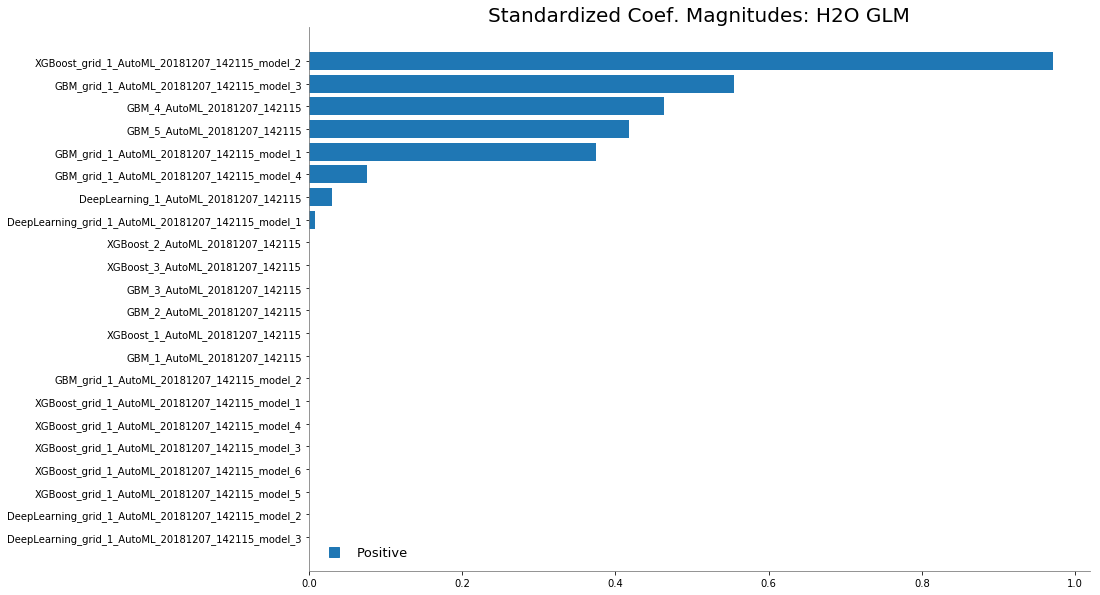

In [6]:
%matplotlib inline
metalearner.std_coef_plot()

In [7]:
aml.leader.download_mojo(path = "./product_model_bin/m25/v4/mojo", get_genmodel_jar = True)

'/home/siemanalyst/notebooks/siem/product_model_bin/m25/v4/mojo/StackedEnsemble_AllModels_AutoML_20181207_142115.zip'

In [8]:
sc.stop()